Creacion de Modelo Random Forest Regressor manteniendo los 6 features mas importantes

In [14]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Cargar el DataFrame
df = pd.read_csv("dataset-rentas-madrid-oct2023.csv")
df.head()


ImportError: cannot import name 'docstring' from 'matplotlib' (/home/mac/.local/lib/python3.10/site-packages/matplotlib/__init__.py)

In [ ]:
pip show scikit-learn

Name: scikit-learn
Version: 1.1.3
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /Users/guillermobogran/Library/Python/3.11/lib/python/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip show flask

Name: Flask
Version: 2.3.3
Summary: A simple framework for building complex web applications.
Home-page: 
Author: 
Author-email: 
License: 
Location: /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages
Requires: blinker, click, itsdangerous, Jinja2, Werkzeug
Required-by: Flask-SQLAlchemy
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Drop las features no relevantes en este modelo (Se analizó previamente que estas no eran relevantes para este modelo)
df = df.drop( ['Air Conditioning','Built-in Wardrobes', 'Elevator', 'Heating', 'Garage', 'Terrace', 'Balcony', 'Garden', 'Pool'], axis=1)

In [ ]:
# Mostrar las columnas
df.columns

Index(['Tipo', 'Distrito', 'Barrio', 'Habitaciones', 'Banos', 'Area',
       'Furnished', 'Precio'],
      dtype='object')

In [ ]:
df.head(10)

,Tipo,Distrito,Barrio,Habitaciones,Banos,Area,Furnished,Precio
0,Piso,Arganzuela,Palos de Moguer,2,2,70,1,3500
1,Piso,Arganzuela,Palos de Moguer,1,1,60,1,1475
2,Piso,Arganzuela,Legazpi,3,2,110,1,1850
3,Piso,Arganzuela,Chopera,2,1,80,1,1250
4,Piso,Arganzuela,Legazpi,1,1,70,1,1290
5,Piso,Arganzuela,Legazpi,2,2,77,1,1300
6,Piso,Arganzuela,Palos de Moguer,1,1,28,1,1400
7,Piso,Arganzuela,Palos de Moguer,3,2,107,1,3000
8,Piso,Arganzuela,Legazpi,1,1,74,0,1200
9,Ático,Arganzuela,Palos de Moguer,2,2,86,1,2000


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Encoding las columnas categoricas
label_encoders = {}
for column in ['Tipo', 'Distrito', 'Barrio']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Splitting los datos en train y test sets
X = df.drop( ['Precio'], axis=1)
y = df['Precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train el Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_features=2, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_features=2, random_state=42)

In [ ]:
# Evaluar el modelo en el set de train
rf_score_train = rf_regressor.score(X_train, y_train)

# Evaluar el modelo en el set de test
rf_score_test = rf_regressor.score(X_test, y_test)

print("RandomForest Regressor has score in train of {:.3f}".format(rf_score_train))
print("RandomForest Regressor has score in test of {:.3f}".format(rf_score_test))


RandomForest Regressor has score in train of 0.962
RandomForest Regressor has score in test of 0.807


In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error


# Predict using Test Data
rf_regressor_prediction = rf_regressor.predict(X_test)

# Validar Metricas r2 y mSE
rf_regressor_r2 = metrics.r2_score(y_test, rf_regressor_prediction)
rf_regressor_mse = metrics.mean_squared_error(y_test, rf_regressor_prediction)

print("RandomForest Regressor has an r2 score in test of {:.3f}".format(rf_regressor_r2))
print("RandomForest Regressor has an MSE score in test of {:.3f}".format(rf_regressor_mse))


RandomForest Regressor has an r2 score in test of 0.807
RandomForest Regressor has an MSE score in test of 583534.992


In [ ]:
import pickle

# Guardamos modelo con pickle
RF_modelo_entrenado = {
    "rf_regressor":rf_regressor
}

with open("RF_modelo_entrenado.pkl", 'wb') as file:
    pickle.dump(RF_modelo_entrenado, file)

In [ ]:
label_to_encoded_mappings = {}
encoded_to_label_mappings = {}

for column, encoder in label_encoders.items():
    label_to_encoded = {label: encoder.transform([label])[0] for label in encoder.classes_}
    encoded_to_label = {encoder.transform([label])[0]: label for label in encoder.classes_}
    
    label_to_encoded_mappings[column] = label_to_encoded
    encoded_to_label_mappings[column] = encoded_to_label

In [ ]:
print(label_to_encoded_mappings['Tipo'])
print(label_to_encoded_mappings['Barrio'])
print(label_to_encoded_mappings['Distrito'])


{'Apartamento': 0, 'Dúplex': 1, 'Piso': 2, 'Ático': 3}
{'Abrantes': 0, 'Acacias': 1, 'Adelfas': 2, 'Alameda de Osuna': 3, 'Almagro': 4, 'Almenara': 5, 'Almendrales': 6, 'Aluche': 7, 'Ambroz': 8, 'Amposta': 9, 'Apóstol Santiago': 10, 'Arapiles': 11, 'Aravaca': 12, 'Arcos': 13, 'Argüelles': 14, 'Atalaya': 15, 'Atocha': 16, 'Bellas Vistas': 17, 'Bernabéu - Hispanoamérica': 18, 'Berruguete': 19, 'Buenavista': 20, 'Butarque': 21, 'Campamento': 22, 'Canillas': 23, 'Canillejas': 24, 'Casa de Campo': 25, 'Casco Histórico de Barajas': 26, 'Casco Histórico de Vallecas': 27, 'Casco histórico de Vicálvaro': 28, 'Castellana': 29, 'Castilla': 30, 'Castillejos': 31, 'Centro': 32, 'Chamartín': 33, 'Chamberí': 34, 'Chopera': 35, 'Ciudad Jardín': 36, 'Ciudad Universitaria': 37, 'Colina': 38, 'Comillas': 39, 'Concepción': 40, 'Corralejos - Campo de las Naciones': 41, 'Cortes - Huertas': 42, 'Costillares': 43, 'Cuatro Caminos': 44, 'Cuatro vientos': 45, 'Delicias': 46, 'El Cañaveral - Los Berrocales': 47,

In [ ]:
encoded_to_label_mappings

{'Tipo': {0: 'Apartamento', 1: 'Dúplex', 2: 'Piso', 3: 'Ático'},
 'Distrito': {0: 'Arganzuela',
  1: 'Barajas',
  2: 'Carabanchel',
  3: 'Centro',
  4: 'Chamartín',
  5: 'Chamberí',
  6: 'Ciudad Lineal',
  7: 'Fuencarral',
  8: 'Hortaleza',
  9: 'Latina',
  10: 'Moncloa',
  11: 'Moratalaz',
  12: 'Puente de Vallecas',
  13: 'Retiro',
  14: 'Salamanca',
  15: 'San Blas',
  16: 'Tetuán',
  17: 'Usera',
  18: 'Vicálvaro',
  19: 'Villa de Vallecas',
  20: 'Villaverde'},
 'Barrio': {0: 'Abrantes',
  1: 'Acacias',
  2: 'Adelfas',
  3: 'Alameda de Osuna',
  4: 'Almagro',
  5: 'Almenara',
  6: 'Almendrales',
  7: 'Aluche',
  8: 'Ambroz',
  9: 'Amposta',
  10: 'Apóstol Santiago',
  11: 'Arapiles',
  12: 'Aravaca',
  13: 'Arcos',
  14: 'Argüelles',
  15: 'Atalaya',
  16: 'Atocha',
  17: 'Bellas Vistas',
  18: 'Bernabéu - Hispanoamérica',
  19: 'Berruguete',
  20: 'Buenavista',
  21: 'Butarque',
  22: 'Campamento',
  23: 'Canillas',
  24: 'Canillejas',
  25: 'Casa de Campo',
  26: 'Casco Históric

In [ ]:
# Extraer el mapping
label_to_encoded = {label: encoder.transform([label])[0] for label in encoder.classes_}
encoded_to_label = {encoder.transform([label])[0]: label for label in encoder.classes_}

In [ ]:
# Hacer Gridsearch CV para buscar los mejores hyperparametros

from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [30, 50, 100],
    "max_features": [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                            scoring = "neg_mean_squared_error",
                            return_train_score=True)

grid_search.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Mostrar el best forest
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_features=2)

In [ ]:
# Revisar Score del best Forest
best_forest.score(X_test , y_test)

# Probar el RF Regressor con los hyperparametros del best forest, si el score mejora hay que dejar el best forest

0.8087020931284717

In [ ]:
# Revisar Feature Importances
rf_regressor.feature_importances_

array([0.01785501, 0.13471919, 0.08718402, 0.07692126, 0.23951591,
       0.40035218, 0.04345243])

Text(0.5, 0, 'Random Forest Feature Importance')

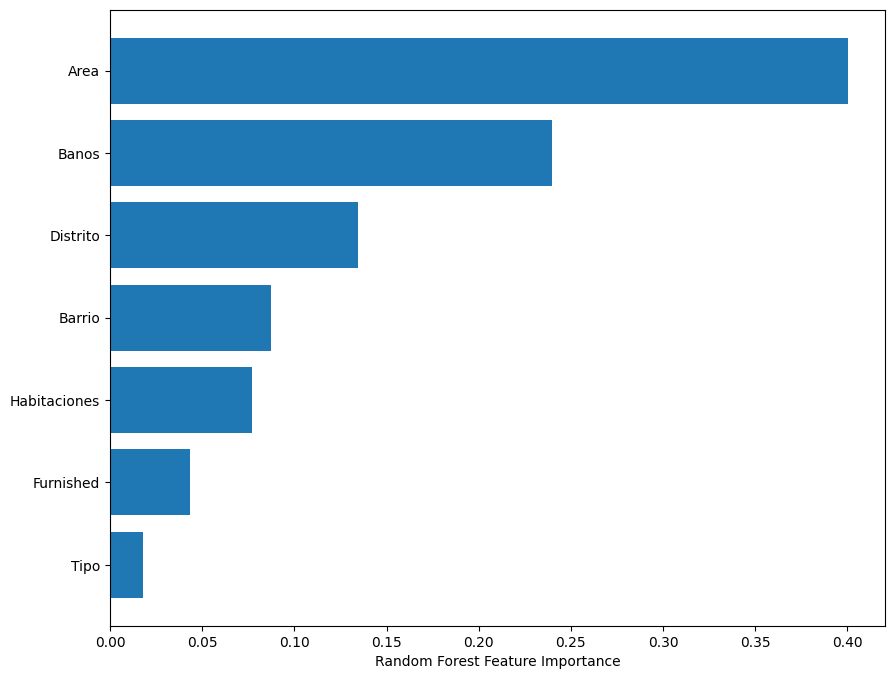

In [ ]:
# Graficar Feature Importances

sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Proceder a hacer predicciones con nuestro modelo entrenado

#### Tipos: 
       ['Piso', 'Ático', 'Dúplex', 'Apartamento']

#### Distritos: 
       ['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral', 'Hortaleza', 'Latina',
       'Moncloa', 'Moratalaz', 'Puente de Vallecas', 'Retiro',
       'Salamanca', 'San Blas', 'Tetuán', 'Usera', 'Vicálvaro',
       'Villa de Vallecas', 'Villaverde']

#### Barrios: 
       ['Palos de Moguer', 'Legazpi', 'Chopera', 'Delicias', 'Acacias',
       'Imperial', 'Atocha', 'Corralejos - Campo de las Naciones',
       'Alameda de Osuna', 'Casco Histórico de Barajas', 'Timón',
       'Comillas', 'Pau de Carabanchel', 'Buenavista', 'San Isidro',
       'Vista Alegre', 'Puerta bonita', 'Opañel', 'Abrantes', 'Centro',
       'Pacífico', 'Embajadores - Lavapiés', 'Sol', 'Palacio',
       'Justicia - Chueca', 'Universidad - Malasaña', 'Cortes - Huertas',
       'El Viso', 'Ciudad Jardín', 'Castilla',
       'Bernabéu - Hispanoamérica', 'Nueva España', 'Prosperidad',
       'Chamartín', 'Almagro', 'Vallehermoso', 'Trafalgar', 'Arapiles',
       'Gaztambide', 'Nuevos Ministerios - Ríos Rosas', 'Chamberí',
       'Colina', 'Ventas', 'Costillares', 'Atalaya', 'Concepción',
       'San Juan Bautista', 'Quintana', 'San Pascual', 'Pueblo Nuevo',
       'Las Tablas', 'Montecarmelo', 'Mirasierra', 'La Paz', 'Peñagrande',
       'Tres Olivos - Valverde', 'Pilar', 'Fuentelarreina', 'El Pardo',
       'Palomas', 'Sanchinarro', 'Piovera - Conde Orgaz', 'Canillas',
       'Pinar del Rey', 'Valdebebas - Valdefuentes',
       'Virgen del Cortijo - Manoteras', 'Apóstol Santiago',
       'Puerta del Ángel', 'Aluche', 'Lucero', 'Águilas', 'Campamento',
       'Los Cármenes', 'Cuatro vientos', 'Argüelles', 'Aravaca',
       'Ciudad Universitaria', 'Valdemarín', 'Valdezarza',
       'Casa de Campo', 'La Florida - El Plantío', 'Media Legua',
       'Vinateros', 'Horcajo', 'Marroquina', 'Fontarrón',
       'Palomeras sureste', 'Numancia', 'San Diego', 'Entrevías',
       'Portazgo', 'Palomeras bajas', 'Ibiza', 'Niño Jesús', 'Jerónimos',
       'Estrella', 'Adelfas', 'Goya', 'Recoletos', 'Guindalera', 'Lista',
       'Castellana', 'Fuente del Berro', 'Simancas', 'Rejas',
       'Rosas - Musas', 'Salvador', 'Arcos', 'Hellín', 'Amposta',
       'Canillejas', 'Cuatro Caminos', 'Castillejos', 'Valdeacederas',
       'Almenara', 'Berruguete', 'Bellas Vistas', 'Tetuán', 'Orcasitas',
       'Pradolongo', 'San Fermín', 'Almendrales', 'Orcasur', 'Moscardó',
       'Zofio', 'Ambroz', 'El Cañaveral - Los Berrocales', 'Vicálvaro',
       'Casco histórico de Vicálvaro', 'Valdebernardo - Valderribas',
       'Ensanche de Vallecas - Valdecarros',
       'Casco Histórico de Vallecas', 'Santa Eugenia', 'Los Ángeles',
       'San Andrés', 'Butarque', 'Los Rosales', 'San Cristóbal']

In [ ]:
# Ingresar parametros de solicitud para uso en la predicción | Esto es lo que el usuario ingresará en el sitio web
solicitud = {
    'Tipo': 'Piso',             # Ingresar un Tipo de vivienda = ['Piso', 'Ático', 'Dúplex', 'Apartamento']
    'Distrito': 'Salamanca',    # Ingresar un Distrito de la Lista de Distritos
    'Barrio': 'Recoletos',           # Ingresar un Barrio de la Lista de Barrios, que sea dentro del Distrito pertinente
    'Habitaciones': 1,          # Ingresar Numero de Habitaciones
    'Banos': 1,                 # Ingresar Numero de Baños
    'Area': 50,                 # Ingresar Area en m2
    'Furnished': 1,             # Ingresar 1 si es amueblado o 0 si no es amueblado
}

# Encode la solicitud usando el label encoder creado anteriormente
for column in ['Tipo', 'Distrito', 'Barrio']:
    solicitud[column] = label_encoders[column].transform([solicitud[column]])[0]

# Predecir el precio de renta para el nuevo_listing
predicted_price = rf_regressor.predict([list(solicitud.values())])[0]

# Mostrar la prediccion de la vivienda 
print("El precio de renta del inmueble a media-estancia es: " , predicted_price.round(2) , "€ por mes")

El precio de renta del inmueble a media-estancia es:  1808.77 € por mes


/Users/guillermobogran/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [19]:
diccionario_idealista_m2 = {
    'Arganzuela': 17.2,
    'Barajas': 13.6,
    'Carabanchel': 13.7,
    'Centro': 20.6,
    'Chamartín': 18.1,
    'Chamberí': 20.6,
    'Ciudad Lineal': 15.4,
    'Fuencarral': 14.1,
    'Hortaleza': 14.5,
    'Latina': 13.8,
    'Moncloa': 17.1,
    'Moratalaz': 12.7,
    'Puente de Vallecas': 13.9,
    'Retiro': 18.0,
    'Salamanca': 21.8,
    'San Blas': 13.3,
    'Tetuán': 17.5,
    'Usera': 13.8,
    'Vicálvaro': 12.3,
    'Villa de Vallecas': 12.7,
    'Villaverde': 12.7
}



In [25]:
#funcion de fiabilidad para tres clases, alta media baja, con la tabla de idealista x barrio

def fiabilidad_prueba_ponderada(alpha,prediccion,m2,distrito):
    return ((((1-alpha)*(prediccion/m2) + alpha*diccionario_idealista_m2[distrito]))*m2 )

fiabilidad_prueba_ponderada(0.5,1500,120,"Carabanchel")

#no se puede poner directamente la fiabilidad de diana. 
# hay que ajustar con la ponderacion para dar mas pesos a idealista en fiabilidades altas y menos en bajas
#una idea seria sustituir el alpha por la fiabilidad de diana y ajustarala para que cuando sea 1 solo considere esa y segun baja pesa mas 
# el idealista

1572.0

**Sugerencia para mejoras del modelo**

1. AI hace una sugerencia, y nosotros hacemos la correcion.

Por ejemplo, nuestras predicciones estan saliendo un poco muy elevadas. Entonces le podemos asignar peso a algunos features:

* Barrio Caro : prediccion se mantiene
    * Barrio Barato : prediccion se ajusta (menos)
* Condicion : Nueva, Moderna - predicción se mantiene
    * Condicion : Viejo, Antiguo - prediccion se ajusta (mas)

Que otras pesos se podrian manipular por el cientifico de datos? Es decir modificar lo que la maquina ha aprendido - es supervisado al final.

2. Normalizar los Datos previo al train